In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
X,Y=make_circles(n_samples=500,noise=0.05)

In [3]:
print(X.shape,Y.shape)

(500, 2) (500,)


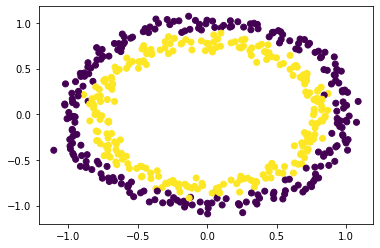

In [4]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [5]:
def phi(X):  # X is a matrix 
    
    x1= X[:,0]
    x2= X[:,1]
    
    x3= x1**2 + x2**2
    
    x_=np.zeros((X.shape[0],3))
    print(x_.shape)
    
    x_[: , : -1]=X
    x_[:,2]=x3
    
    return x_
    

In [6]:
x_=phi(X)

(500, 3)


In [7]:
def plot3d(X,show=True):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade=True)
    
    if(show==True):
        plt.show()
    return ax

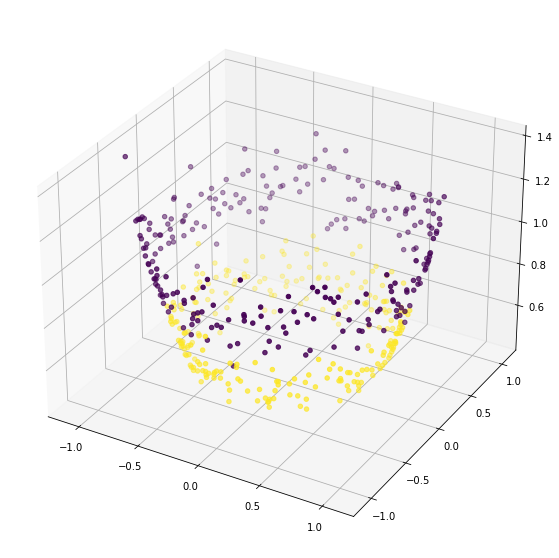

In [8]:
ax = plot3d(x_)

### Logistic Classifier 

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [10]:
lr=LogisticRegression()

In [11]:
acc=cross_val_score(lr,X,Y,cv=5).mean()
print("Acuuracy on X(2D) Is %.4f" %(acc*100))

Acuuracy on X(2D) Is 45.6000


### Logistic Classifier on High Dimension x_

In [12]:
acc=cross_val_score(lr,x_,Y,cv=5).mean()
print("Acuuracy on X(2D) Is %.4f" %(acc*100))

Acuuracy on X(2D) Is 98.6000


### Visualise the Decision Surface 

In [13]:
lr.fit(x_,Y)

LogisticRegression()

In [14]:
wt=lr.coef_
print(wt)
print(wt[0,0])

[[  0.09160465   0.06280784 -10.22146243]]
0.09160464933237003


In [15]:
bias=lr.intercept_

In [16]:
xx,yy=np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [17]:
z= -(wt[0,0]*xx + wt[0,1]*yy +bias)/wt[0,2]
print(z)

[[0.78563807 0.79460006 0.80356205 0.81252404]
 [0.79178277 0.80074476 0.80970675 0.81866874]
 [0.79792747 0.80688946 0.81585145 0.82481344]
 [0.80407217 0.81303416 0.82199616 0.83095815]]


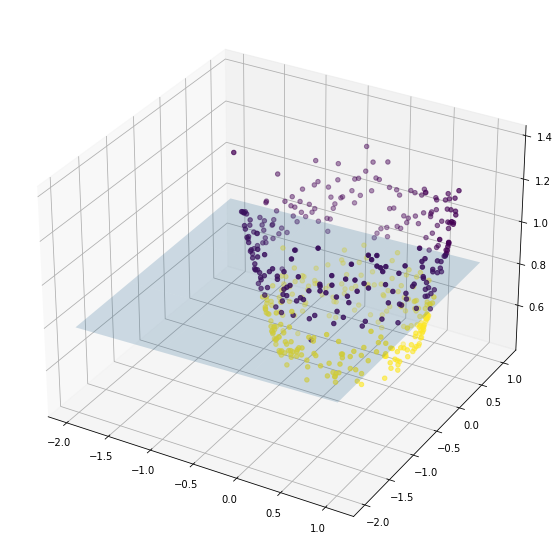

In [18]:
ax = plot3d(x_,False)
ax.plot_surface(xx,yy,z,alpha=0.2)
plt.show()

### SVM using kernels

In [33]:
from sklearn import svm

In [34]:
#kernel = linear
svc=svm.SVC(kernel='linear')
svc.fit(X,Y)
svc.score(X,Y)

0.504

In [35]:
# kernel using RBF
svc=svm.SVC(kernel='rbf')
svc.fit(X,Y)
svc.score(X,Y)

0.986

In [37]:
svc=svm.SVC(kernel='poly')
svc.fit(X,Y)
svc.score(X,Y)

0.57

### Costom Kernel

In [41]:
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T))

svc=svm.SVC(kernel= custom_kernel)
svc.fit(X,Y)
svc.score(X,Y)


0.986

(500,) (500,)
